In [70]:
import pandas as pd
import matplotlib.pyplot as plt

In [71]:
df = pd.read_csv('data/owid_co2_data.csv')
df.head()

,iso_code,country,year,co2,co2_per_capita,trade_co2,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,...,ghg_excluding_lucf_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
0,AFG,Afghanistan,1949,0.015,0.002,NaN,NaN,NaN,0.015,0.002,...,NaN,NaN,NaN,NaN,NaN,7624058.0,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1950,0.084,0.011,NaN,NaN,NaN,0.021,0.003,...,NaN,NaN,NaN,NaN,NaN,7752117.0,9.421400e+09,NaN,NaN,NaN
2,AFG,Afghanistan,1951,0.092,0.012,NaN,NaN,NaN,0.026,0.003,...,NaN,NaN,NaN,NaN,NaN,7840151.0,9.692280e+09,NaN,NaN,NaN
3,AFG,Afghanistan,1952,0.092,0.012,NaN,NaN,NaN,0.032,0.004,...,NaN,NaN,NaN,NaN,NaN,7935996.0,1.001733e+10,NaN,NaN,NaN
4,AFG,Afghanistan,1953,0.106,0.013,NaN,NaN,NaN,0.038,0.005,...,NaN,NaN,NaN,NaN,NaN,8039684.0,1.063052e+10,NaN,NaN,NaN


In [72]:
df = df.filter(['iso_code','year', 'co2', 'population'], axis=1)
df.head()

,iso_code,year,co2,population
0,AFG,1949,0.015,7624058.0
1,AFG,1950,0.084,7752117.0
2,AFG,1951,0.092,7840151.0
3,AFG,1952,0.092,7935996.0
4,AFG,1953,0.106,8039684.0


In [73]:
#Removing null rows that contains null values in co2 column
df = df[df.co2.notna()]

In [74]:
x = df.iso_code.value_counts()
print(x)

OWID_WRL    271
GBR         271
CAN         236
DEU         229
POL         221
           ... 
ATA          21
TLS          19
CXR          14
OWID_KOS     13
PRI           1
Name: iso_code, Length: 219, dtype: int64


In [75]:
#Removing rows with year less than 1950
filtered_df = df.drop(df[df.year < 1950].index)

#Removing rows that refers to the globe
filtered_df = filtered_df.drop(
    filtered_df[filtered_df.iso_code == 'OWID_WRL'].index)

#Since this study consists of the analysis of climate change from 1950
#The countries that appear less than 71 times are not considered because the lack of data
freq_table = filtered_df.iso_code.value_counts()

countries_to_delete = []
for iso_code, value in freq_table.items():
    if value < 71:
        countries_to_delete.append(iso_code)

for iso_code in countries_to_delete:
    filtered_df = filtered_df.drop(filtered_df[filtered_df.iso_code == iso_code].index)
    
x = filtered_df.iso_code.value_counts()
print(x)

AFG    71
SPM    71
NIC    71
NGA    71
PRK    71
       ..
GHA    71
GRC    71
GRL    71
GRD    71
ZWE    71
Name: iso_code, Length: 163, dtype: int64


In [76]:
import numpy as np
from scipy import stats

#Calculate co2 mean
mean = filtered_df.co2.mean()
print('co2 mean: ', round(mean, 3))
print('---------------------------------------------')

#Calculate co2 median
median = filtered_df.co2.median()
print('co2 median: ', round(median, 3))
print('---------------------------------------------')

#Calculate co2 trimmed mean
co2_sorted = filtered_df.co2.sort_values()
co2_sorted = co2_sorted.reset_index(drop=True)
limit = 0.1
limits = (co2_sorted[round(filtered_df.co2.shape[0]*limit)], 
          co2_sorted[round(filtered_df.co2.shape[0]*(1-limit))])
trimmed_mean = stats.tmean(co2_sorted, limits=limits)
print("co2 trimmed mean:", round(trimmed_mean,2), "with limits:", limits)
print('---------------------------------------------')

#Calculate co2 variance
variance = filtered_df.co2.var()
print('co2 variance: ', round(variance, 3))
print('---------------------------------------------')

#Calculate co2 variance
standard_deviation = filtered_df.co2.std()
print('co2 standard deviation: ', round(standard_deviation, 3))
print('---------------------------------------------')

#Calculate co2 variance
mean_absolute_deviation = filtered_df.co2.mad()
print('co2 mean absolute deviation: ', round(mean_absolute_deviation, 3))
print('---------------------------------------------')

co2 mean:  415.033
---------------------------------------------
co2 median:  11.106
---------------------------------------------
co2 trimmed mean: 59.54 with limits: (0.264, 588.615)
---------------------------------------------
co2 variance:  2384252.681
---------------------------------------------
co2 standard deviation:  1544.103
---------------------------------------------
co2 mean absolute deviation:  655.715
---------------------------------------------


In [77]:
import math

import numpy as np
from scipy import stats

#Caluclate the mean of co2 for each country from 1950 to 2020
iso_codes = filtered_df.iso_code.value_counts()
means = []
for iso_code in iso_codes.index:
    means.append(filtered_df[filtered_df.iso_code == iso_code].co2.mean())
        
means_to_series = pd.Series(means)

#Calculate co2 mean
mean = means_to_series.mean()
print('co2 mean: ', round(mean, 3))
print('---------------------------------------------')

#Calculate co2 median
median = means_to_series.median()
print('co2 median: ', round(median, 3))
print('---------------------------------------------')

#Calculate co2 trimmed mean
co2_sorted = means_to_series.sort_values()
co2_sorted = co2_sorted.reset_index(drop=True)
limit = 0.1
limits = (co2_sorted[round(means_to_series.shape[0]*limit)], 
          co2_sorted[round(means_to_series.shape[0]*(1-limit))])
trimmed_mean = stats.tmean(co2_sorted, limits=limits)
print("co2 trimmed mean:", round(trimmed_mean,2), "with limits:", limits)
print('---------------------------------------------')

#Calculate co2 variance
variance = means_to_series.var()
print('co2 variance: ', round(variance, 3))
print('---------------------------------------------')

#Calculate co2 standard deviation
standard_deviation = means_to_series.std()
print('co2 standard deviation: ', round(standard_deviation, 3))
print('---------------------------------------------')

#Calculate co2 mean absolute deviation
mean_absolute_deviation = means_to_series.mad()
print('co2 mean absolute deviation: ', round(mean_absolute_deviation, 3))
print('---------------------------------------------')

co2 mean:  121.158
---------------------------------------------
co2 median:  11.091
---------------------------------------------
co2 trimmed mean: 34.89 with limits: (0.431492957746479, 254.05183098591544)
---------------------------------------------
co2 variance:  221548.878
---------------------------------------------
co2 standard deviation:  470.69
---------------------------------------------
co2 mean absolute deviation:  171.219
---------------------------------------------


[315.628338028169, 1536.5339014084507, 265.63171830985914, 402.4757887323945, 556.374098591549, 4609.558112676056, 277.9209859154929, 258.0555633802817, 411.61485915492955, 3292.5643661971826, 244.37242253521126, 739.1025070422534, 254.05183098591544, 325.19711267605624, 867.756591549296, 380.9405211267606, 900.7831267605635, 4110.182647887323]
['POL', 'RUS', 'MEX', 'UKR', 'GBR', 'USA', 'ZAF', 'KOR', 'CAN', 'CHN', 'AUS', 'IND', 'IRN', 'ITA', 'JPN', 'FRA', 'DEU', 'Others (146)']


(-1.1149960964001837,
 1.1007140998285803,
 -1.1021304572016029,
 1.1261253147783923)

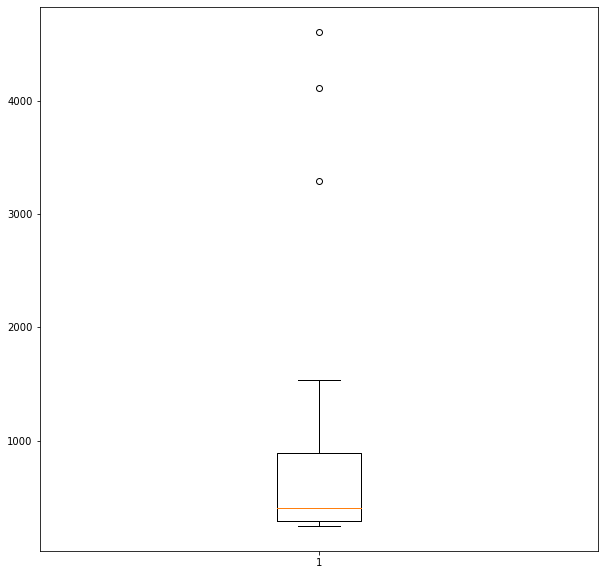

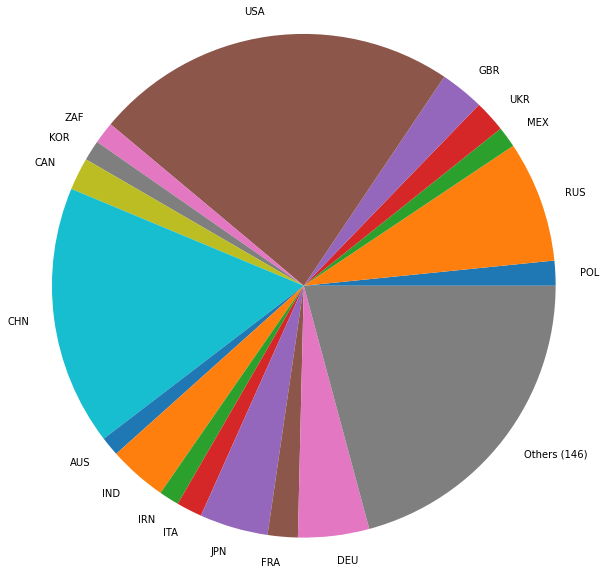

In [78]:
#Graphics
values = []
labels = []
others_value = 0

for index, mean in enumerate(means):
    if mean > 243:
        values.append(mean)
        labels.append(iso_codes.index[index])
    else:
        others_value = others_value + mean

labels.append('Others (' + str(len(means) - len(values)) + ')')
values.append(others_value)
        
print(values)
print(labels)


fig, ax = plt.subplots(figsize=(10, 10))
ax.boxplot(values)

fig1, ax1 = plt.subplots(figsize=(10, 10))
ax1.pie(values, labels=labels)
ax1.axis("equal")


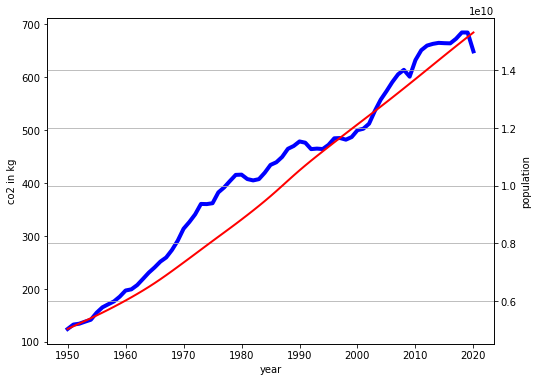

In [80]:
years = filtered_df.year.value_counts(sort=False, ascending=True)

#Calculate co2 mean for each year
co2_means = []
for year in years.index:
    co2_means.append(filtered_df[filtered_df.year == year].co2.mean())

#Calculate population sum for each year
population_means = []
for year in years.index:
    population_means.append(filtered_df[filtered_df.year == year].population.sum())

fig, ax_left = plt.subplots(figsize=(8,6))
ax_right = ax_left.twinx()
    
ax_left.set(ylabel='co2 in kg')
ax_left.set(xlabel='year')
ax_left.plot(years.index, co2_means, linewidth=4.0, 
             color='blue', label='co2 in kg')
ax_right.set(ylabel='population')
ax_right.grid(None)
ax_right.plot(years.index, population_means, linewidth=2.0, 
         color='red')


In [ ]:
#TODO Fare correlazione tra popolazione e co2 
# e tra crescita econimica e co2